# Probit regression and Fisher scoring method

## "SAheart" dataset

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


data = pd.read_csv("SaHeart.txt", delimiter=' ')

data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [ ]:
Y = data.chd
X = data.drop("chd", axis=1)
X['is_present'] = (X['famhist'] == 'Present')
X['is_present'] = X['is_present'].astype(int)
X = X.drop('famhist', axis = 1)
Y_array = Y.values
X_array = X.values
column_names = X.columns.tolist()

In [ ]:
p = X.shape[1]
n = X.shape[0]


x = np.ones(n, dtype=int)
x = np.reshape(x, (n, 1))
x = np.hstack((x, X))
x


y=np.array(Y)
y = y.reshape((n,1))

## Modified relative convergence criterion

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def probit_mrc(X, Y, epsilon):

    n, p = X.shape

    b_0 = np.zeros((p, 1))

    probs = norm.cdf(np.dot(X, b_0))
    W = np.diag((norm.pdf(norm.ppf(probs))**2 / (probs * (1 - probs))).reshape(n,))
    Z = np.dot(X, b_0) + (Y - probs) / (norm.pdf(norm.ppf(probs)))

    c1 = []

    i = 0
    conv1 = False

    while conv1 == False:

        i+=1

        b = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ Z)
        probs = norm.cdf(np.dot(X, b))
        W = np.diag((norm.pdf(norm.ppf(probs))**2 / (probs * (1 - probs))).reshape(n,))
        Z = np.dot(X, b) + (Y - probs) / (norm.pdf(norm.ppf(probs)))

        value = np.linalg.norm(b - b_0) / (np.linalg.norm(b_0) + epsilon)

        c1.append(value)

        if value < epsilon:
            conv1 = True
            print(f'Convergence reached at iteration number {i}')
            print(f'Convergence reached with value: {value}')
            print('\n')

        b_0 = b

    return [b, c1, i]


In [ ]:
beta1 = probit_mrc(x,y,epsilon = 0.000001)
beta_mrc = beta1[0].reshape((p+1,))
print("Beta:", beta_mrc)
print('\n')
print("Convergence values:", beta1[1])

Convergence reached at iteration number 7
Convergence reached with value: 7.091249888298373e-08


Beta: [-3.57018428e+00  3.78935601e-03  4.82198099e-02  1.02828863e-01
  1.23956593e-02  2.35557473e-02 -4.01620824e-02  1.95572378e-05
  2.62694088e-02  5.38979000e-01]


Convergence values: [2565831.184086036, 0.32629761508272004, 0.059253567389561, 0.0028446583865988683, 6.249799007192953e-05, 3.156232678466335e-06, 7.091249888298373e-08]


## Relative convergence criterion

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def probit_rc(X, Y, epsilon):

    n, p = X.shape

    b_0 = np.zeros((p, 1))

    probs = norm.cdf(np.dot(X, b_0))
    W = np.diag((norm.pdf(norm.ppf(probs))**2 / (probs * (1 - probs))).reshape(n,))
    Z = np.dot(X, b_0) + (Y - probs) / (norm.pdf(norm.ppf(probs)))

    c2 = []

    i = 0
    conv2 = False

    while conv2 == False:

        i+=1

        b = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ Z)
        probs = norm.cdf(np.dot(X, b))
        W = np.diag((norm.pdf(norm.ppf(probs))**2 / (probs * (1 - probs))).reshape(n,))
        Z = np.dot(X, b) + (Y - probs) / (norm.pdf(norm.ppf(probs)))

        value = np.linalg.norm(b - b_0) / (np.linalg.norm(b_0))

        c2.append(value)

        if value < epsilon:
            conv2 = True
            print(f'Convergence reached at iteration number {i}')
            print(f'Convergence reached with value: {value}')
            print('\n')

        b_0 = b

    return [b, c2, i]


In [ ]:
beta2 = probit_rc(x,y,epsilon = 0.000001)
beta_rc = beta2[0].reshape((p+1,))
print("Beta:", beta_rc)
print('\n')
print("Convergence values:", beta2[1])

Convergence reached at iteration number 7
Convergence reached with value: 7.091251851087541e-08


Beta: [-3.57018428e+00  3.78935601e-03  4.82198099e-02  1.02828863e-01
  1.23956593e-02  2.35557473e-02 -4.01620824e-02  1.95572378e-05
  2.62694088e-02  5.38979000e-01]


Convergence values: [inf, 0.3262977422530566, 0.05925358480782872, 0.0028446591762153394, 6.249800737178714e-05, 3.1562335520835248e-06, 7.091251851087541e-08]


C:\Users\Acer\AppData\Local\Temp\ipykernel_24696\1665851845.py:29: RuntimeWarning: divide by zero encountered in scalar divide
  value = np.linalg.norm(b - b_0) / (np.linalg.norm(b_0))


## Absolute convergence criterion

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def probit_ac(X, Y, epsilon):

    n, p = X.shape

    b_0 = np.zeros((p, 1))

    probs = norm.cdf(np.dot(X, b_0))
    W = np.diag((norm.pdf(norm.ppf(probs))**2 / (probs * (1 - probs))).reshape(n,))
    Z = np.dot(X, b_0) + (Y - probs) / (norm.pdf(norm.ppf(probs)))

    c3 = []

    i = 0
    conv3 = False

    while conv3 == False:

        i+=1

        b = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ Z)
        probs = norm.cdf(np.dot(X, b))
        W = np.diag((norm.pdf(norm.ppf(probs))**2 / (probs * (1 - probs))).reshape(n,))
        Z = np.dot(X, b) + (Y - probs) / (norm.pdf(norm.ppf(probs)))

        value = np.linalg.norm(b - b_0)

        c3.append(value)

        if value < epsilon:
            conv3 = True
            print(f'Convergence reached at iteration number {i}')
            print(f'Convergence reached with value: {value}')
            print('\n')

        b_0 = b

    return [b, c3, i]


In [ ]:
beta3 = probit_ac(x,y,epsilon = 0.000001)
beta_ac = beta3[0].reshape((p+1,))
print("Beta:", beta_ac)
print('\n')
print("Convergence values:", beta3[1])

Convergence reached at iteration number 7
Convergence reached with value: 2.5619582431399106e-07


Beta: [-3.57018428e+00  3.78935601e-03  4.82198099e-02  1.02828863e-01
  1.23956593e-02  2.35557473e-02 -4.01620824e-02  1.95572378e-05
  2.62694088e-02  5.38979000e-01]


Convergence values: [2.565831184086036, 0.8372249223697603, 0.20156919949703547, 0.01024811902460204, 0.00022578219614739325, 1.1402943528598058e-05, 2.5619582431399106e-07]


In [ ]:
import pandas as pd
df= pd.DataFrame({'Modified relative convergence': beta_mrc, 'Relative convergence': beta_rc, 'Absolute convergence': beta_ac},
                 index= ["intercept", "sbp", "tobacco", "ldl", "adiposity", "typea", "obesity", "alcohol", "age", "famhist"])
df

,Modified relative convergence,Relative convergence,Absolute convergence
intercept,-3.570184,-3.570184,-3.570184
sbp,0.003789,0.003789,0.003789
tobacco,0.048220,0.048220,0.048220
ldl,0.102829,0.102829,0.102829
adiposity,0.012396,0.012396,0.012396
typea,0.023556,0.023556,0.023556
obesity,-0.040162,-0.040162,-0.040162
alcohol,0.000020,0.000020,0.000020
age,0.026269,0.026269,0.026269
famhist,0.538979,0.538979,0.538979


The estimated coefficients through the application of the three converge criteria are the same.

## Significance of the coefficients

We modified the function 'probit_mrc' to include the computation the significance of the coefficients.

In [ ]:
import numpy as np
from scipy.stats import norm

def probit_mrc(X, Y, epsilon):
    n, p = X.shape
    b_0 = np.zeros((p, 1))
    probs = norm.cdf(np.dot(X, b_0))
    W = np.diag((norm.pdf(norm.ppf(probs))**2 / (probs * (1 - probs))).reshape(n,))
    Z = np.dot(X, b_0) + (Y - probs) / (norm.pdf(norm.ppf(probs)))

    c1 = []
    i = 0
    conv1 = False

    while not conv1:
        i += 1
        b = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ Z)
        probs = norm.cdf(np.dot(X, b))
        W = np.diag((norm.pdf(norm.ppf(probs))**2 / (probs * (1 - probs))).reshape(n,))
        Z = np.dot(X, b) + (Y - probs) / (norm.pdf(norm.ppf(probs)))

        value = np.linalg.norm(b - b_0) / (np.linalg.norm(b_0) + epsilon)
        c1.append(value)
        if value < epsilon:
            conv1 = True
            print(f'Convergence reached at iteration number {i}')
            print(f'Convergence reached with value: {value}')

        b_0 = b

    fim = X.T @ W @ X
    var_b = np.linalg.inv(fim)
    se_b = np.sqrt(np.diag(var_b))

    z_scores = b.flatten() / se_b
    p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))

    return b, se_b, z_scores, p_values, c1, i

b, se_b, z_scores, p_values, c1, i = probit_mrc(x, y, 0.000001)

df= pd.DataFrame({'Coefficients': b. flatten(), 'Standard error': se_b, 'z-score': z_scores, 'p-value': p_values},
            index= ["intercept", "sbp", "tobacco", "ldl", "adiposity", "typea", "obesity", "alcohol", "age", "famhist"])
df


Convergence reached at iteration number 7
Convergence reached with value: 7.091249888298373e-08


,Coefficients,Standard error,z-score,p-value
intercept,-3.570184,0.751762,-4.749089,0.000002
sbp,0.003789,0.003428,1.105448,0.268966
tobacco,0.048220,0.015839,3.044441,0.002331
ldl,0.102829,0.035289,2.913908,0.003569
adiposity,0.012396,0.017382,0.713145,0.475756
typea,0.023556,0.007188,3.277140,0.001049
obesity,-0.040162,0.026284,-1.527977,0.126518
alcohol,0.000020,0.002686,0.007281,0.994191
age,0.026269,0.007038,3.732720,0.000189
famhist,0.538979,0.134819,3.997802,0.000064


## Average Marginal Effects

In [ ]:
import numpy as np
from scipy.stats import norm

def probit_ame(X, b):
    eta = np.dot(X, b)
    pdf = norm.pdf(eta)

    me = pdf * b.flatten()
    ame = np.mean(me, axis=0)
    return ame

In [ ]:
ame = probit_ame(x, b)
ame
variable_names = list(X.columns)
variable_names.insert(0, "intercept")
ame_df = pd.DataFrame({"Variable": variable_names, "AME": ame})
ame = ame_df.drop(0)
ame

,Variable,AME
1,sbp,0.001093
2,tobacco,0.013906
3,ldl,0.029655
4,adiposity,0.003575
5,typea,0.006793
6,obesity,-0.011582
7,alcohol,0.000006
8,age,0.007576
9,is_present,0.155437


# Convergency diagnostics

## MRC

Text(0.5, 1.0, 'Convergence MRC')

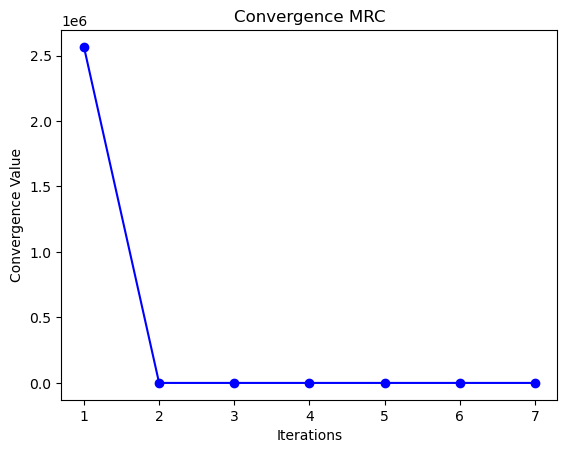

In [ ]:
plt.plot(range(1, beta1[2]+1), beta1[1], marker='o', linestyle='-', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Convergence Value')
plt.title('Convergence MRC')

Text(0.5, 1.0, 'Convergence MRC')

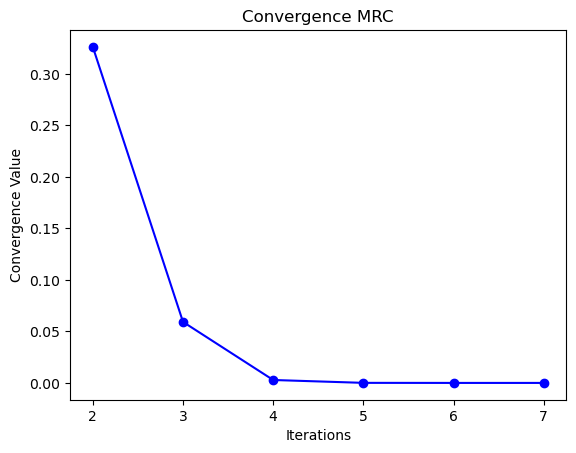

In [ ]:
plt.plot(range(2, beta1[2]+1), beta1[1][1:], marker='o', linestyle='-', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Convergence Value')
plt.title('Convergence MRC')

## RC

Text(0.5, 1.0, 'Convergence RC')

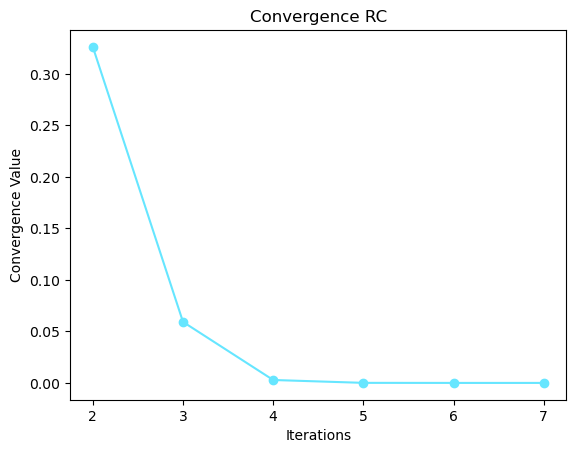

In [ ]:
darker_blue = (0.4, 0.9, 1.0)
plt.plot(range(1, beta2[2]+1), beta2[1], marker='o', linestyle='-', color=darker_blue)
plt.xlabel('Iterations')
plt.ylabel('Convergence Value')
plt.title('Convergence RC')

## AC

Text(0.5, 1.0, 'Convergence AC')

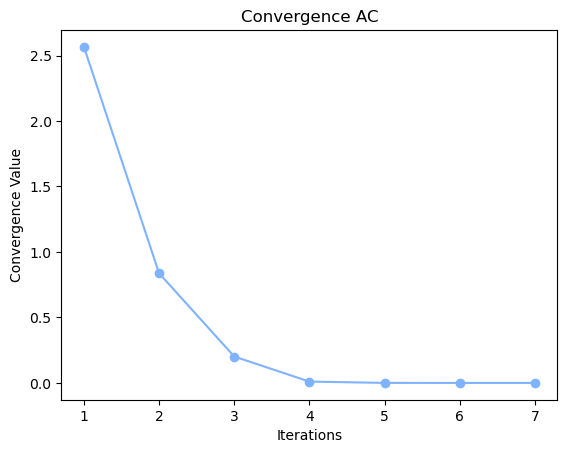

In [ ]:
lighter_blue = (0.5, 0.7, 1.0)
plt.plot(range(1, beta3[2]+1), beta3[1], marker='o', linestyle='-', color=lighter_blue)
plt.xlabel('Iterations')
plt.ylabel('Convergence Value')
plt.title('Convergence AC')

## MRC Log-likelihood maximization

We modified the function 'probit_mrc' to compute the log-liklihood values at each iteration.

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def probit_mrc(X, Y, epsilon):

    n, p = X.shape

    b_0 = np.zeros((p, 1))

    probs = norm.cdf(np.dot(X, b_0))
    W = np.diag((norm.pdf(norm.ppf(probs))**2 / (probs * (1 - probs))).reshape(n,))
    Z = np.dot(X, b_0) + (Y - probs) / (norm.pdf(norm.ppf(probs)))

    l = []

    i = 0
    conv1 = False

    while conv1 == False:

        l.append(np.sum(Y * np.log(probs) + (1 - Y) * np.log(1 - probs)))

        i+=1

        b = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ Z)
        probs = norm.cdf(np.dot(X, b))
        W = np.diag((norm.pdf(norm.ppf(probs))**2 / (probs * (1 - probs))).reshape(n,))
        Z = np.dot(X, b) + (Y - probs) / (norm.pdf(norm.ppf(probs)))

        value = np.linalg.norm(b - b_0) / (np.linalg.norm(b_0) + epsilon)

        if value < epsilon:
            conv1 = True

        b_0 = b

    return [b, l, i]


Text(0.5, 1.0, 'Log-Likelihood maximization')

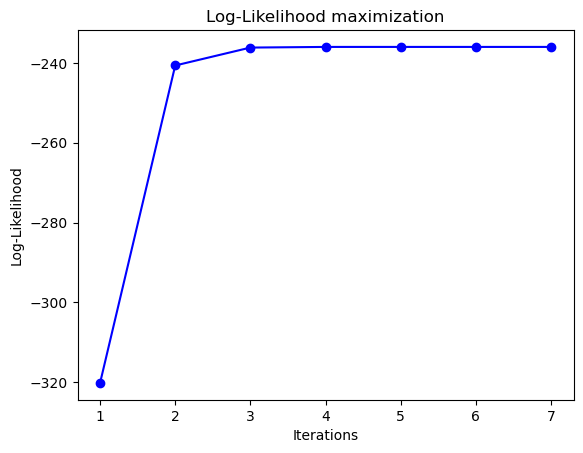

In [ ]:
beta = probit_mrc(x,y,epsilon = 0.000001)
plt.plot(range(1, beta[2]+1), beta[1], marker='o', linestyle='-', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood maximization')